In [2]:
import pathlib
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [3]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/mgreenbe/.keras/datasets/flower_photos')

In [10]:
CLASSES = dict(daisy="0", dandelion="1", roses="2", sunflowers="3", tulips="4")
INV_CLASSES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
print(CLASSES)

{'daisy': '0', 'dandelion': '1', 'roses': '2', 'sunflowers': '3', 'tulips': '4'}


In [5]:
train_filenames = []
train_classes = []
test_filenames = []
test_classes = []
for flower in CLASSES:
    path = pathlib.Path(data_dir/flower)
    for i, source in enumerate(path.iterdir()):
        if i < 500:
            train_filenames.append(str(source))
            train_classes.append(CLASSES[flower])
        else:
            test_filenames.append(str(source))
            test_classes.append(CLASSES[flower])
            
train_df = pd.DataFrame({"filename": train_filenames, "class": train_classes})
test_df = pd.DataFrame({"filename": test_filenames, "class": test_classes})

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

train_flow = train_gen.flow_from_dataframe(
        dataframe=train_df,
        x_col="filename",
        y_col="class",
        target_size=(224, 224),
        batch_size=11,
        class_mode="categorical")

test_flow = train_gen.flow_from_dataframe(
        dataframe=test_df,
        x_col="filename",
        y_col="class",
        target_size=(224, 224),
        batch_size=11,
        class_mode="categorical")

Found 2500 validated image filenames belonging to 5 classes.
Found 1170 validated image filenames belonging to 5 classes.


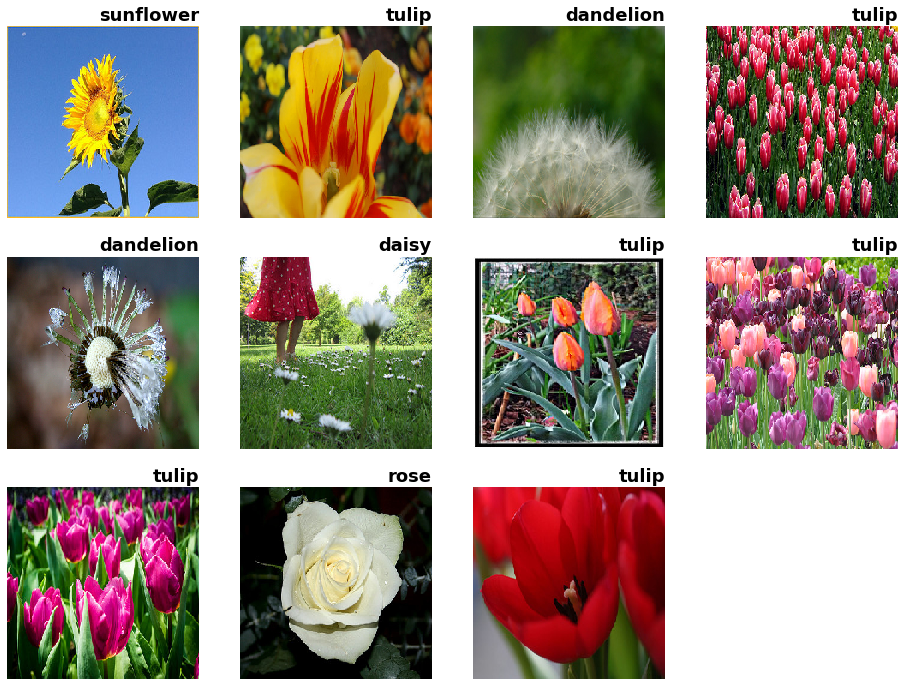

In [11]:
def grid(X, fig=None, labels=None, fontsize=18):
    for i, (x, ax) in enumerate(zip(X, fig.axes)):
        ax.imshow(x)
        ax.set_axis_off()
    if labels is not None:
        for ax, label in zip(fig.axes, list(labels)):
            ax.set_title(str(label), fontsize=fontsize, fontweight="bold", loc="right")
    for i, ax in enumerate(fig.axes):
        if i >= len(X):
            ax.remove()

X, y = next(train_flow)            
fig, _ = plt.subplots(3, 4, figsize=(16,12))
grid(X, fig, labels=[INV_CLASSES[i] for i in y.argmax(axis=1)])

In [239]:
base = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base.trainable = False
model = Sequential([base, Flatten(), Dense(5, activation="softmax")])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


In [242]:
model.fit_generator(train_flow, epochs=10, validation_data=test_flow)

Epoch 1/10
228/228 [==============================] - 347s 2s/step - loss: 7.7565 - accuracy: 0.4780 - val_loss: 8.7808 - val_accuracy: 0.4308
Epoch 2/10
228/228 [==============================] - 342s 2s/step - loss: 7.2810 - accuracy: 0.5284 - val_loss: 10.2560 - val_accuracy: 0.3359
Epoch 3/10
 83/228 [=========>....................] - ETA: 3:02 - loss: 6.9381 - accuracy: 0.5564

KeyboardInterrupt: 